### How can we choose a proper relaxation time list in our PMMA contact problem?

Our viscoelastic solver is based on linear viscoelastic model, with widely-used generalized Maxwell model. The parameters, i.e. relaxation times and elastic moduli of generalized Maxwell model are determined from either a relaxation or a Dynamical Mechanical Analysis(DMA) experiments. In Jalocha(2015)[1], they propose two techniques to identify an optimal series of relaxation times. In the case of the relaxation experiment relaxation times will be optimized from the numerical integration of the measured relaxation spectrum. In the case of the DMA experiments we show that mathematical results obtained by Krein and Nudelmann can be used to determine the complete series of relaxation times.

The main constitutive unknown is the relaxation spectrum $H(\tau)$ (Findley et al., 1976) which is related to the relaxation modulus $E(t)$ by:

$$
E(t)=E_0+\int_{-\infty}^{\infty} H(\tau) e^{-\frac{t}{\tau}} d \ln (\tau)
$$


For practical reasons it is convenient to use a model, where the continuous spectrum of relaxation $H(\tau)$ is replaced with a finite spectrum $\hat{H}(\tau)$:

$$
\hat{H}(\tau)=\sum_{i=1}^n E_i \delta\left(1-\frac{\tau}{\tau_i}\right)
$$

In the discrete case of Prony series, the relaxation modulus $E(t)$ is represented as:

$$
E(t)=E_0+\sum_{i=1}^n E_i e^{-\frac{t}{\tau_i}}
$$

In the frequency domain, the dynamical modulus $E^*(\omega)$ becomes:

$$
E^{\prime}(\omega)=E_0+\sum_{i=1}^n \frac{E_i \omega^2 \tau_i^2}{1+\omega^2 \tau_i^2} \quad E^{\prime \prime}(\omega)=\sum_{i=1}^n \frac{E_i \omega \tau_i}{1+\omega^2 \tau_i^2}
$$

#### DMA experiment

For a given frequency $\omega$, the complex dynamical modulus is defined as:

$$
E^*(\omega)=\frac{\sigma^*}{\varepsilon^*}=E^{\prime}(\omega)+i E^{\prime \prime}(\omega)
$$



##### *HW method*

In Jalocha(2015)[1], they first reviewed *HW* method proposed by *Honerkamp (1989)* and *Honerkamp and Weese (1990)*, where they first choose arbitrary Maxwell branches and solve the dynamical modulus $E^{\prime}(\omega)$ and $E^{\prime \prime}(\omega)$ equation, $\mathbf{E}^{\prime}=\mathbf{E}_{\mathbf{0}}+\mathbf{A E}$ and $\mathbf{E}^{\prime \prime}=\mathbf{B E}$, in the frequency domain, where the matrix $\mathbf{A}$ and $\mathbf{B}$ are defined as:

$$
\mathbf{A}=\left(a_{i j}\right) \quad a_{j i}=\frac{\omega_j^2 \tau_i^2}{1+\omega_j^2 \tau_i^2}
$$

$$
\mathbf{B}=\left(b_{i j}\right) \quad b_{j i}=\frac{\omega_j \tau_i}{1+\omega_j^2 \tau_i^2}
$$



##### *Proposed procedure: the KN + HW method* in Jalocha(2015)[1]

The method proposed permits to replace the arbitrary choice of the relaxation times with an exact computation of the series of relaxation times. This novelty eliminates the first step of the *HW method*, where the relaxation times are generally imposed as a linear series on the logarithmic scale.(More detailed mathmatical deduce is in Appendix)

- Step 1: Build the two complex matrices $\mathbf{M}^1$ and $\mathbf{M}^2$ defined by their components:

$$
M_{k l}^1=i \frac{\overline{E_k^*}-E_l^*}{\omega_k+\omega_l} \quad M_{k l}^2=\frac{\frac{\overline{E_k^*}}{\omega_k}+\frac{E_l^*}{\omega_l}}{\omega_k+\omega_l}
$$

where $E_k^*=E_k^{\prime}+i E_k^{\prime \prime}$ with $k, l=1, m$ and $\overline{E_k^*}$ the conjugate complex number of $E_k^*$. To explain more about parameter $m$, if the measurement is repeated for $m$ different frequencies $\omega_i, i=1, m$, the preceding procedure will provide data set $\left(\omega_j, E_j^{\prime}\left(\omega_j\right), E_j^{\prime \prime}\left(\omega_j\right)\right)$ for $1 \leqslant j \leqslant m$.


In [1]:
import numpy as np

omega = np.logspace(-3, 3, 31) 

E_moduli = np.array([400, 300, 150, 8])
tau = np.array([0.05, 0.2, 2, 10])
E_prime = np.sum(E_moduli * omega**2 * tau**2 / (1 + omega**2 * tau**2))
E_double_prime = np.sum(E_moduli * omega * tau / (1 + omega**2 * tau**2))

'''
E_prime = np.array([10, 20, 30, 40, 50])  
E_double_prime = np.array([5, 15, 25, 35, 45])
'''
  



# Rest of the code

ValueError: operands could not be broadcast together with shapes (4,) (31,) 

In [2]:


def build_matrices(E_prime, E_double_prime, omega):
    m = len(omega)
    E_star = E_prime + 1j * E_double_prime 
    M1 = np.zeros((m, m), dtype=complex)
    M2 = np.zeros((m, m), dtype=complex)

    for k in range(m):
        for l in range(m):
            M1[k, l] = 1j * (np.conjugate(E_star[k]) - E_star[l]) / (omega[k] + omega[l])
            M2[k, l] = (np.conjugate(E_star[k]) / omega[k] + E_star[l] / omega[l]) / (omega[k] + omega[l])

    return M1, M2


M1, M2 = build_matrices(E_prime, E_double_prime, omega)

print("M1 matrix:\n", M1)
print("M2 matrix:\n", M2)



NameError: name 'E_prime' is not defined


- Step 2: Check the positive definition of matrices $\mathbf{M}^1\left(E^*, \omega\right)$ and $\mathbf{M}^2\left(E^*, \omega\right)$.


In [ ]:
def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

is_M1_positive_definite = is_positive_definite(M1)
is_M2_positive_definite = is_positive_definite(M2)

print(f"M1 Positive Definite: {is_M1_positive_definite}")
print(f"M2 Positive Definite: {is_M2_positive_definite}")



- Step 3: Compute the $\mathbf{v}$ and $\mathbf{w}$ the eigenvectors spanning the kernel of $\mathbf{M}^1$ $\mathbf{M}^2$, respectively and the two complex-valued functions $f_1$ and $f_2$ :
  
$$
f_1(s)=\sum_{j=1}^m \frac{v_j}{s+i \omega_j} \quad f_2(s)=\sum_{j=1}^m \frac{w_j}{s+i \omega_j}
$$


In [ ]:
def compute_eigenvectors(matrix):
    eigvals, eigvecs = np.linalg.eig(matrix)
    kernel_indices = np.where(np.isclose(eigvals, 0))[0]
    return eigvecs[:, kernel_indices]

v = compute_eigenvectors(M1)
w = compute_eigenvectors(M2)



- Step 4: Find numerically the common real positive zeros $s_i$ of $f_1$ and $f_2$.

The number of solutions will define the number of elements in the generalized Maxwell model and the values of the characteristic times are:

$$
\tau_i=\frac{1}{S_i}
$$


In [3]:
from scipy.optimize import fsolve

def f(s, omega, v_or_w):
    result = 0
    for j in range(len(omega)):
        result += v_or_w[j] / (s + 1j * omega[j])
    return result

def find_common_zeros(f1, f2, s_initial_guesses):
    common_zeros = []
    for s0 in s_initial_guesses:
        zero = fsolve(lambda s: np.abs(f1(s) - f2(s)), s0)
        if zero > 0 and np.isclose(f1(zero), f2(zero), atol=1e-6):
            common_zeros.append(zero)
    return np.unique(common_zeros)


s_initial_guesses = 1/tau
f1 = lambda s: f(s, omega, v)
f2 = lambda s: f(s, omega, w)
common_zeros = find_common_zeros(f1, f2, s_initial_guesses)
tau = 1 / np.array(common_zeros)
print(f"Characteristic Times (tau): {tau}")


ModuleNotFoundError: No module named 'scipy'


- Step 5: Compute the values of the moduli, by using the HW inverse identification described before.

$\mathbf{E}=\mathbf{A}^{+}\left(\mathbf{E}^{\prime}-\mathbf{E}_0\right)$ or $\mathbf{E}=\mathbf{B}^{+} \mathbf{E}^{\prime \prime}$

In [ ]:
from numpy.linalg import pinv

def compute_moduli(E_prime, E_0, tau, omega):
    A = np.zeros((len(omega), len(tau)))
    for i in range(len(omega)):
        for j in range(len(tau)):
            A[i, j] = omega[i]**2 * tau[j]**2 / (1 + omega[i]**2 * tau[j]**2)
    
    E_prime_shifted = E_prime - E_0
    E_moduli = np.dot(pinv(A), E_prime_shifted)
    return E_moduli

####Q: What about E_0
E_0 = np.min(E_prime)  
E_moduli = compute_moduli(E_prime, E_0, tau, omega)
print(f"Moduli (E): {E_moduli}")


#### Application to artificial data

As stated in the presentation of the $\mathrm{KN}+\mathrm{HW}$ method, the key point of the identification algorithm is the positive definition of the two matrices $\mathbf{M}^1$ and $\mathbf{M}^2$ and the necessary correction of the data.



**Table 1**
Generalized Maxwell model used to generate artificial data.

| $\tau_i(\mathrm{s})$ | 0.05 | 0.2 | 2   | 10  |
|-----------------------|------|-----|-----|-----|
| $E_i(\mathrm{Pa})$   | 400  | 300 | 150 | 8   |


ValueError: x and y must have same first dimension, but have shapes (100,) and (5,)

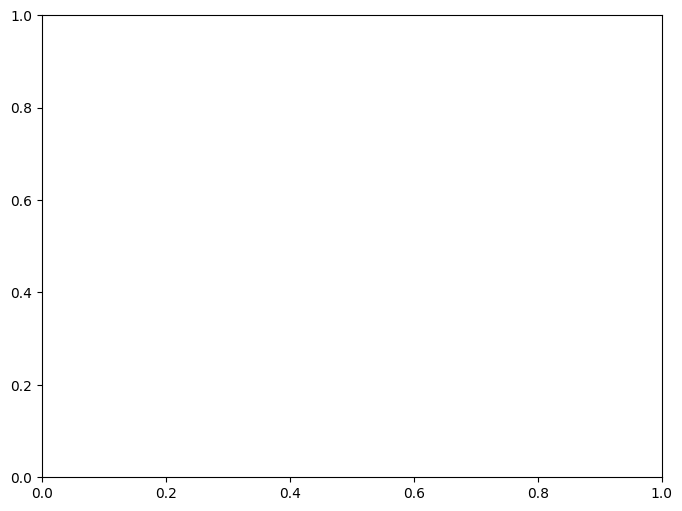

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


omega = np.logspace(-3, 3, 100) 
''' 
E_prime = np.log10(omega) + 1  
E_double_prime = np.log10(omega) + 2 
'''

plt.figure(figsize=(8, 6))


plt.plot(omega, E_prime, 'bo-', label=r"$E'$ (Simulated behavior)")
plt.scatter(omega, E_prime, color='blue', s=10)

plt.plot(omega, E_double_prime, 'ro-', label=r"$E''$ (Simulated behavior)")
plt.scatter(omega, E_double_prime, color='red', s=10)


plt.xscale('log')
plt.yscale('log')

# 添加标签和标题
plt.xlabel(r'$\omega$ (rad/sec)')
plt.ylabel(r"$E'$ and $E''$ (Pa)")
plt.legend()
plt.title('Dynamic Modulus vs Frequency')

# 显示网格
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 显示图形
plt.show()


#### Reference 

[1] Jalocha, D., A. Constantinescu, and R. Neviere. ‘Revisiting the Identification of Generalized Maxwell Models from Experimental Results’. International Journal of Solids and Structures 67–68 (August 2015): 169–81. https://doi.org/10.1016/j.ijsolstr.2015.04.018.

[2]


#### Appendix

*KN + HW* method

The Nevanlinna Pick interpolation problem consists in finding a complex function $F$ : $\mathbb{C} \longrightarrow \mathbb{C}$ interpolating the data pairs $\left(z_k, c_k\right)_{k=1, m}$, 

Moreover, a function $F(z)$ will be denoted as a $S$-function if:

$$
F(z)=\gamma+\int_0^{\infty} \frac{d \sigma(t)}{t-z}
$$

The viscoelastic identification problem can be transformed in the structure defined by the Pick-Nevalinna interpolation problem in the class of S-function. Actually the complex modulus of the viscoelastic problem is the conformal transform of an S-function:

$$
E^*(\omega)=E_0+\int_0^{\infty} H(\tau) \frac{i \omega \tau}{1+i \omega \tau} d \tau
$$
